<a href="https://colab.research.google.com/github/gusotope/hello_world_2020/blob/master/EEG_ts_fastai2_3d_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries

In [0]:
#https://github.com/timeseriesAI/timeseriesAI/blob/master/tutorial_nbs/01_Intro_to_Time_Series_Classification.ipynb
#timeseriesAI by Ignacio Oguiza

!pip install git+https://github.com/fastai/fastcore.git@master -q
!pip install git+https://github.com/fastai/fastai2.git@master -q
!pip install git+https://github.com/timeseriesAI/timeseriesAI.git@master -q

     |████████████████████████████████| 5.0MB 3.3MB/s 


In [0]:
import tsai
from tsai.all import *
from fastai2.basics import *
from fastai2.tabular.all import *
display(HTML("<style>.container {width:95% !important; }</style>"))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
print('tsai       :', tsai.__version__)
print('fastai2    :', fastai2.__version__)
print('fastcore   :', fastcore.__version__)
print('torch      :', torch.__version__)
print('scipy      :', sp.__version__)
print('numpy      :', np.__version__)
print('pandas     :', pd.__version__)
print(f'Total RAM  : {bytes2GB(psutil.virtual_memory().total):5.2f} GB')
print(f'Used RAM   : {bytes2GB(psutil.virtual_memory().used):5.2f} GB')
print('n_cpus     :', cpus)
iscuda = torch.cuda.is_available()
if iscuda: print('device     : {} ({})'.format(device, torch.cuda.get_device_name(0)))
else: print('device     :', device)

tsai       : 0.0.7
fastai2    : 0.0.17
fastcore   : 0.1.17
torch      : 1.4.0
scipy      : 1.4.1
numpy      : 1.18.3
pandas     : 1.0.3
Total RAM  : 35.35 GB
Used RAM   :  1.13 GB
n_cpus     : 40
device     : cpu


##Import files

In [0]:
import gdown
#all eeg csv files
!gdown https://drive.google.com/uc?id=1qfCJg8MJYcDLKewj8bNu5h_m_dx9GQyD

Downloading...
From: https://drive.google.com/uc?id=1qfCJg8MJYcDLKewj8bNu5h_m_dx9GQyD
To: /content/csv_eeg_data.zip
349MB [00:03, 102MB/s] 


In [0]:
#unzip folder
!unzip './csv_eeg_data.zip'

Archive:  ./csv_eeg_data.zip
  inflating: csv_data/eeg_record28.mat.csv  
  inflating: csv_data/eeg_record16.mat.csv  
  inflating: csv_data/eeg_record22.mat.csv  
  inflating: csv_data/eeg_record30.mat.csv  
  inflating: csv_data/eeg_record14.mat.csv  
  inflating: csv_data/eeg_record33.mat.csv  
  inflating: csv_data/eeg_record34.mat.csv  
  inflating: csv_data/eeg_record26.mat.csv  
  inflating: csv_data/eeg_record25.mat.csv  
  inflating: csv_data/eeg_record20.mat.csv  
  inflating: csv_data/eeg_record24.mat.csv  
  inflating: csv_data/eeg_record32.mat.csv  
  inflating: csv_data/eeg_record18.mat.csv  
  inflating: csv_data/eeg_record27.mat.csv  
  inflating: csv_data/eeg_record15.mat.csv  
  inflating: csv_data/eeg_record21.mat.csv  
  inflating: csv_data/eeg_record12.mat.csv  
  inflating: csv_data/eeg_record13.mat.csv  
  inflating: csv_data/eeg_record19.mat.csv  
  inflating: csv_data/eeg_record10.mat.csv  
  inflating: csv_data/eeg_record11.mat.csv  
  inflating: csv_data/eeg_

In [0]:
import glob
import pandas as pd

#define path
path = './csv_data'                     
#get all file names using os.path.join as this makes concatenation OS independent
all_files = glob.glob(os.path.join(path, "*.csv"))      
all_files

['./csv_data/eeg_record17.mat.csv',
 './csv_data/eeg_record7.mat.csv',
 './csv_data/eeg_record30.mat.csv',
 './csv_data/eeg_record29.mat.csv',
 './csv_data/eeg_record10.mat.csv',
 './csv_data/eeg_record1.mat.csv',
 './csv_data/eeg_record27.mat.csv',
 './csv_data/eeg_record34.mat.csv',
 './csv_data/eeg_record24.mat.csv',
 './csv_data/eeg_record32.mat.csv',
 './csv_data/eeg_record20.mat.csv',
 './csv_data/eeg_record12.mat.csv',
 './csv_data/eeg_record13.mat.csv',
 './csv_data/eeg_record9.mat.csv',
 './csv_data/eeg_record8.mat.csv',
 './csv_data/eeg_record33.mat.csv',
 './csv_data/eeg_record5.mat.csv',
 './csv_data/eeg_record22.mat.csv',
 './csv_data/eeg_record11.mat.csv',
 './csv_data/eeg_record14.mat.csv',
 './csv_data/eeg_record21.mat.csv',
 './csv_data/eeg_record4.mat.csv',
 './csv_data/eeg_record6.mat.csv',
 './csv_data/eeg_record15.mat.csv',
 './csv_data/eeg_record31.mat.csv',
 './csv_data/eeg_record23.mat.csv',
 './csv_data/eeg_record16.mat.csv',
 './csv_data/eeg_record18.mat.csv',

In [0]:
#remove eeg16&28&6, too small or corrupted
#all_files = np.delete(all_files, [3,26,29])
all_files = np.delete(all_files, [22,26,28])
all_files

array(['./csv_data/eeg_record17.mat.csv',
       './csv_data/eeg_record7.mat.csv',
       './csv_data/eeg_record30.mat.csv',
       './csv_data/eeg_record29.mat.csv',
       './csv_data/eeg_record10.mat.csv',
       './csv_data/eeg_record1.mat.csv',
       './csv_data/eeg_record27.mat.csv',
       './csv_data/eeg_record34.mat.csv',
       './csv_data/eeg_record24.mat.csv',
       './csv_data/eeg_record32.mat.csv',
       './csv_data/eeg_record20.mat.csv',
       './csv_data/eeg_record12.mat.csv',
       './csv_data/eeg_record13.mat.csv',
       './csv_data/eeg_record9.mat.csv', './csv_data/eeg_record8.mat.csv',
       './csv_data/eeg_record33.mat.csv',
       './csv_data/eeg_record5.mat.csv',
       './csv_data/eeg_record22.mat.csv',
       './csv_data/eeg_record11.mat.csv',
       './csv_data/eeg_record14.mat.csv',
       './csv_data/eeg_record21.mat.csv',
       './csv_data/eeg_record4.mat.csv',
       './csv_data/eeg_record15.mat.csv',
       './csv_data/eeg_record31.mat.csv',
     

In [0]:
len(all_files)

31

##Data cleaning

In [0]:
#separate data according to the response
#1: focused
#2: unfocused
#3: drowsy

df = pd.read_csv(all_files[0], header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,89,0,0,4433.8,3913.3,5092.8,3830.8,4037.4,4267.2,4248.2,4021.0,4185.1,4303.1,4153.3,4287.2,4331.8,4076.9,1558,1719,1073.1,0.031277,0,0,0,0,1
1,0.0,90,0,0,4429.7,3917.9,5095.9,3831.3,4037.4,4273.8,4253.3,4027.2,4189.7,4303.1,4162.6,4287.2,4326.7,4079.5,1558,1719,1073.1,0.031277,0,0,0,0,1
2,0.0,91,0,443,4426.7,3916.9,5094.9,3831.3,4037.4,4276.9,4252.3,4022.6,4180.0,4303.1,4174.9,4287.2,4326.7,4082.1,1557,1720,1073.1,0.031277,0,0,0,0,1
3,0.0,92,0,0,4427.2,3914.9,5090.8,3830.8,4037.4,4271.8,4249.7,4020.0,4176.4,4303.1,4186.7,4287.2,4333.3,4085.1,1558,1720,1073.1,0.031277,0,0,0,0,1
4,0.0,93,0,0,4432.3,3916.4,5090.3,3830.3,4037.4,4264.1,4247.2,4023.1,4182.6,4303.1,4190.8,4287.2,4335.9,4088.2,1557,1720,1073.1,0.031277,0,0,0,0,1


In [0]:
#size of each response in dataframe
df.groupby(26).size()

26
1    127793
2    127892
3    127892
4     60395
dtype: int64

In [0]:
list_size = [0, df.groupby(26).size()[1], df.groupby(26).size()[2], df.groupby(26).size()[3]]
list_size

[0, 127793, 127892, 127892]

In [0]:
#determine minimal size of each response from files

for filename in all_files:
    df_f = pd.read_csv(filename, header= None)
    if df_f.groupby(26).size()[1] < list_size[1]:
      list_size[1] = df_f.groupby(26).size()[1]
    if df_f.groupby(26).size()[2] < list_size[2]:
      list_size[2] = df_f.groupby(26).size()[2]
    if df_f.groupby(26).size()[3] < list_size[3]:
      list_size[3] = df_f.groupby(26).size()[3]

list_size

[0, 127261, 126896, 53183]

In [0]:
#uniform length/size for each response
size = list_size[3]

#create 1 dataframe
df_from_each_file = (pd.read_csv(f, header = None) for f in all_files)
df_uniform = (pd.concat([df_f.iloc[0:size,:], 
                    df_f.iloc[df_f.groupby(26).size()[1]:df_f.groupby(26).size()[1]+size,:], 
                    df_f.iloc[df_f.groupby(26).size()[1]+df_f.groupby(26).size()[2]:df_f.groupby(26).size()[1]+df_f.groupby(26).size()[2]+size,:]]) 
                    for df_f in df_from_each_file)

df_uniform_concat = pd.concat(df_uniform)

In [0]:
#uniform length/size for each response
#reduce size
size = 20000

#create 1 dataframe
df_from_each_file = (pd.read_csv(f, header = None) for f in all_files)
df_uniform = (pd.concat([df_f.iloc[0:size,:], 
                    df_f.iloc[df_f.groupby(26).size()[1]:df_f.groupby(26).size()[1]+size,:], 
                    df_f.iloc[df_f.groupby(26).size()[1]+df_f.groupby(26).size()[2]:df_f.groupby(26).size()[1]+df_f.groupby(26).size()[2]+size,:]]) 
                    for df_f in df_from_each_file)

df_uniform_concat = pd.concat(df_uniform)

In [0]:
df_uniform_concat.groupby(26).size()

26
1    1648673
2    1648673
3    1648673
dtype: int64

In [0]:
#clean new dataframe by removing unused columns
eeg_proc = df_uniform_concat.copy()
eeg_proc = eeg_proc.iloc[:, 4:]
eeg_proc.drop(eeg_proc.iloc[:, 14:22], inplace = True, axis = 1)
#reset column index
eeg_proc = eeg_proc.T.reset_index(drop=True).T
eeg_proc.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4433.8,3913.3,5092.8,3830.8,4037.4,4267.2,4248.2,4021.0,4185.1,4303.1,4153.3,4287.2,4331.8,4076.9,1.0
1,4429.7,3917.9,5095.9,3831.3,4037.4,4273.8,4253.3,4027.2,4189.7,4303.1,4162.6,4287.2,4326.7,4079.5,1.0
2,4426.7,3916.9,5094.9,3831.3,4037.4,4276.9,4252.3,4022.6,4180.0,4303.1,4174.9,4287.2,4326.7,4082.1,1.0
3,4427.2,3914.9,5090.8,3830.8,4037.4,4271.8,4249.7,4020.0,4176.4,4303.1,4186.7,4287.2,4333.3,4085.1,1.0
4,4432.3,3916.4,5090.3,3830.3,4037.4,4264.1,4247.2,4023.1,4182.6,4303.1,4190.8,4287.2,4335.9,4088.2,1.0


In [0]:
eeg_proc.groupby(14).size()

14
1.0    1648673
2.0    1648673
3.0    1648673
dtype: int64

In [0]:
#normalize data
response_arr = np.array(eeg_proc.iloc[:, 14])
eeg_proc = (eeg_proc-eeg_proc.mean())/eeg_proc.std()
eeg_proc[14] = response_arr

eeg_proc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.615409,-1.004526,0.466527,0.552880,-0.09872,-0.411979,-0.412221,-0.100122,0.276596,-0.366124,1.750735,0.309665,-0.695676,-0.696788,1.0
1,-1.182522,-0.932813,0.495546,0.651368,-0.09872,-0.355964,-0.353220,-0.012312,0.347078,-0.366124,3.213243,0.309665,-2.136031,-0.662657,1.0
2,-1.597483,-0.948403,0.486185,0.651368,-0.09872,-0.329654,-0.364789,-0.077462,0.198453,-0.366124,5.147527,0.309665,-2.136031,-0.628527,1.0
3,-1.528323,-0.979582,0.447804,0.552880,-0.09872,-0.372938,-0.394868,-0.114285,0.143294,-0.366124,7.003181,0.309665,-0.272043,-0.589145,1.0
4,-0.822890,-0.956198,0.443124,0.454392,-0.09872,-0.438289,-0.423790,-0.070380,0.238291,-0.366124,7.647942,0.309665,0.462255,-0.548450,1.0


In [0]:
eeg_proc.min()

0    -547.505905
1     -49.532263
2     -47.207873
3    -573.716291
4    -225.035898
5     -33.045978
6     -41.846714
7     -43.329421
8     -50.443265
9     -14.798654
10   -264.457042
11   -219.790876
12   -905.040437
13    -44.070385
14      1.000000
dtype: float64

##Data cleaning 2
Select 2 channels only

In [0]:
eeg_proc = df_uniform_concat.copy()
#channel 5, channel 15, response
eeg_proc = pd.DataFrame(np.array([eeg_proc.iloc[:, 4].to_numpy(), eeg_proc.iloc[:, 14].to_numpy(), eeg_proc.iloc[:, 26].to_numpy()]).T)
eeg_proc.head()

,0,1,2
0,4433.8,4153.3,1.0
1,4429.7,4162.6,1.0
2,4426.7,4174.9,1.0
3,4427.2,4186.7,1.0
4,4432.3,4190.8,1.0


In [0]:
eeg_proc.groupby(2).size()

2
1.0    1648673
2.0    1648673
3.0    1648673
dtype: int64

In [0]:
#normalize data
response_arr = np.array(eeg_proc.iloc[:, 2])
eeg_proc = (eeg_proc-eeg_proc.mean())/eeg_proc.std()
eeg_proc[2] = response_arr

eeg_proc.head()

,0,1,2
0,-0.615409,1.750735,1.0
1,-1.182522,3.213243,1.0
2,-1.597483,5.147527,1.0
3,-1.528323,7.003181,1.0
4,-0.822890,7.647942,1.0


##Prepare dataset

☣️ **Something very important when you prepare your own data is that data needs to be in a 3-d array with the following format:**

1. Samples
2. Variables (i.e. # of channels)
3. Length (aka time steps)

In [0]:
#datapoints/length in each reshaped sample
size

53183

In [0]:
#number of samples
samples = len(all_files) * 3
samples

93

In [0]:
#create 3d numpy array with same length
#train: 73 samples

X_train = eeg_proc.iloc[:size, :14].to_numpy()
y_train = np.array(eeg_proc.iloc[0, 14])
i = 1
while i < 73:
  X_train = np.dstack((X_train, eeg_proc.iloc[size * i:size * (i+1), :14].to_numpy()))
  y_train = np.append(y_train, eeg_proc.iloc[size * i, 14])
  i += 1

(X_train.shape, y_train.shape)

((53183, 14, 73), (73,))

In [0]:
X_train = np.reshape(X_train, (73, 14, size))
X_train.shape

(73, 14, 53183)

In [0]:
#test: 20 samples

X_test = eeg_proc.iloc[size * 73:size * 74, :14].to_numpy()
y_test = np.array(eeg_proc.iloc[size * 73, 14])
j = 74
while j < 93:
  X_test = np.dstack((X_test, eeg_proc.iloc[size * j:size * (j+1), :14].to_numpy()))
  y_test = np.append(y_test, eeg_proc.iloc[size * j, 14])
  j += 1

(X_test.shape, y_test.shape)

((53183, 14, 20), (20,))

In [0]:
X_test = np.reshape(X_test, (20, 14, size))
X_test.shape

(20, 14, 53183)

In [0]:
#use an item tfm to transform y into categories
tfms  = [None, [Categorize()]]

#split X_train (73) into train (58) and validate (15)
splits = (L(list(np.arange(58))), L(list(np.arange(58, len(X_train)))))
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)

In [0]:
#build the dataloaders that will create batches of data
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=4, num_workers=30)

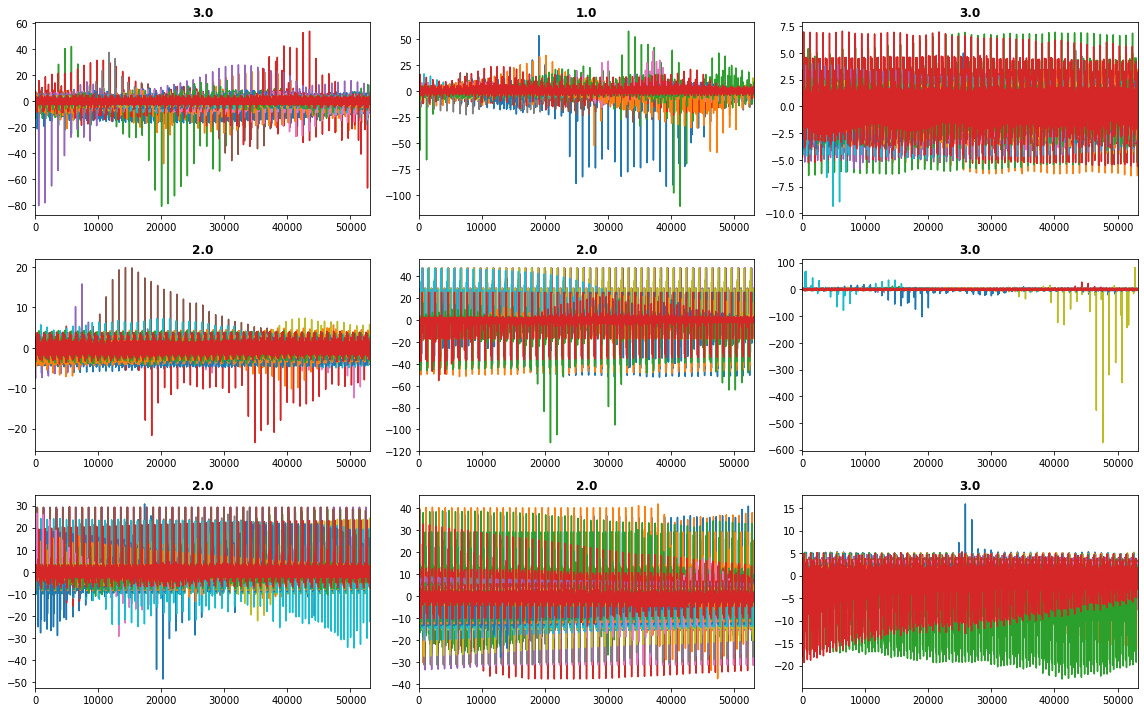

In [0]:
#visualize
dls.show_batch()

##Prepare dataset 2
for 2 channels

In [0]:
#number of samples
samples = len(all_files) * 3
samples

In [0]:
#create 3d numpy array with same length
#train: 73 samples

X_train = eeg_proc.iloc[:size, :2].to_numpy()
y_train = np.array(eeg_proc.iloc[0, 2])
i = 1
while i < 73:
  X_train = np.dstack((X_train, eeg_proc.iloc[size * i:size * (i+1), :2].to_numpy()))
  y_train = np.append(y_train, eeg_proc.iloc[size * i, 2])
  i += 1

X_train = np.reshape(X_train, (73, 2, size))
(X_train.shape, y_train.shape)

((73, 2, 53183), (73,))

In [0]:
#test: 20 samples

X_test = eeg_proc.iloc[size * 73:size * 74, :2].to_numpy()
y_test = np.array(eeg_proc.iloc[size * 73, 2])
j = 74
while j < 93:
  X_test = np.dstack((X_test, eeg_proc.iloc[size * j:size * (j+1), :2].to_numpy()))
  y_test = np.append(y_test, eeg_proc.iloc[size * j, 2])
  j += 1

X_test = np.reshape(X_test, (20, 2, size))
(X_test.shape, y_test.shape)

((20, 2, 53183), (20,))

In [0]:
#use an item tfm to transform y into categories
tfms  = [None, [Categorize()]]

#split X_train (73) into train (58) and validate (15)
splits = (L(list(np.arange(58))), L(list(np.arange(58, len(X_train)))))
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)

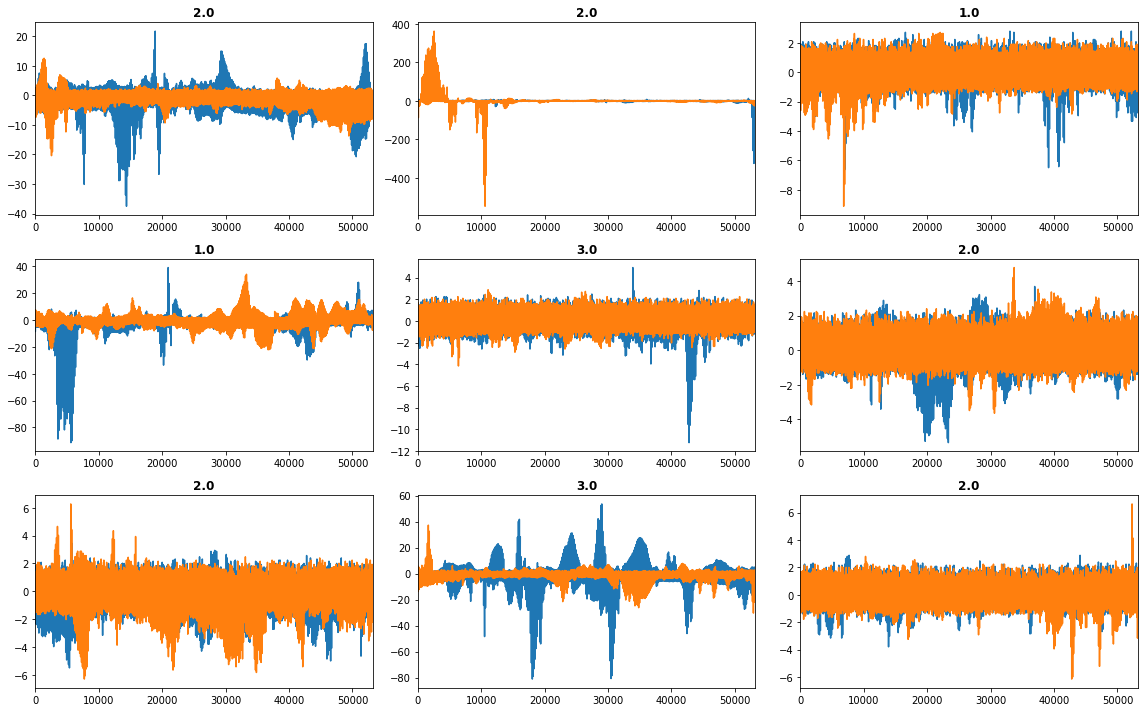

In [0]:
#build the dataloaders that will create batches of data
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[16, 8], num_workers=30)

#visualize
dls.show_batch()

##Learning

In [0]:
#variables/channels, categories/responses
(dls.vars, dls.c)

(14, 3)

In [0]:
#build learner
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage0')

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=5.754399353463668e-06)

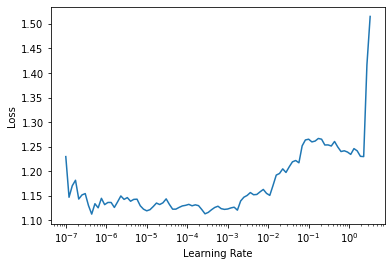

In [0]:
#find optimal learning ratetorch.cuda.is_available()
learn.load('stage0')
learn.lr_find()

In [0]:
torch.cuda.is_available()

True

In [0]:
learn.fit_one_cycle(25, lr_max=1e-2)
learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time
0,1.163749,1.113806,0.333333,02:07
1,1.134101,1.245607,0.333333,02:05
2,1.176064,10.650983,0.333333,02:05
3,1.181171,1.765773,0.333333,02:03
4,1.184566,1.185922,0.333333,02:06
5,1.169711,1.099168,0.266667,02:06
6,1.149805,2.118988,0.333333,02:06
7,1.148415,1.245515,0.333333,02:06
8,1.151599,1.158473,0.333333,02:08
9,1.143526,1.198141,0.200000,02:08


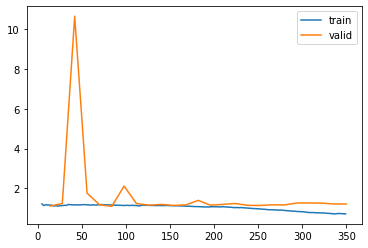

In [0]:
learn.recorder.plot_loss()

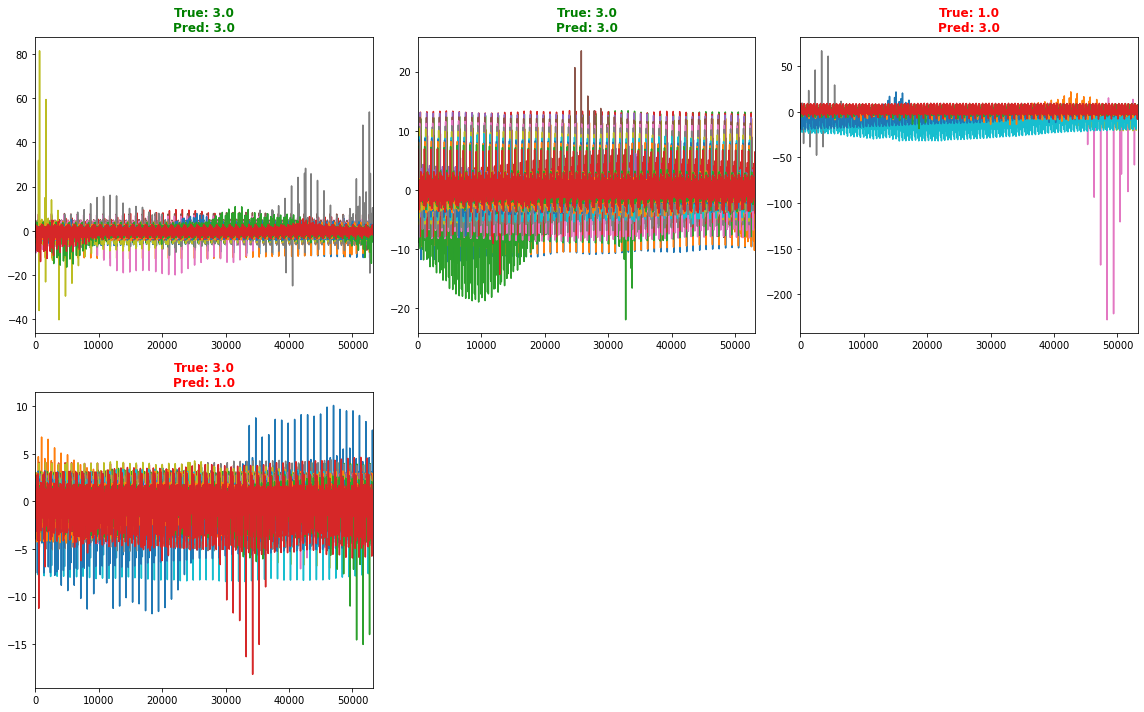

In [0]:
learn.show_results()

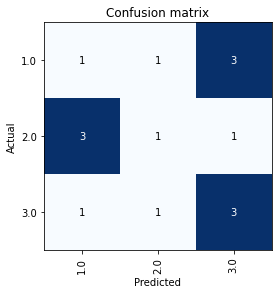

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()